In [1]:
import re
import string
import numpy as np 
import pandas as pd
import seaborn as sb
from PIL import Image
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#from nltk.corpus import stopwords
from collections import defaultdict
import nltk

In [2]:
dt = pd.read_csv('./joe-rogan-experience-1169-elon-musk.csv')
dt[0:10]

,Timestamp,Speaker,Text
0,[00:00:00],Joe Rogan,"Ah, ha, ha, ha. Four, three, two, one, boom. T..."
1,[00:00:09],Elon Musk,You're welcome.
2,[00:00:10],Joe Rogan,It's very good to meet you.
3,[00:00:11],Elon Musk,Nice to meet you too.
4,[00:00:12],Joe Rogan,And thanks for not lighting this place on fire.
5,[00:00:13],Elon Musk,You're welcome. That's coming later.
6,[00:00:16],Joe Rogan,"How does one, just in the middle of doing all ..."
7,[00:00:30],Elon Musk,"Well, the flame, we didn't put a lot of time i..."
8,[00:01:02],Joe Rogan,"Now, who-"
9,[00:01:02],Elon Musk,"And then, we have a merchandise section that o..."


In [3]:
dt['Timestamp'] = dt['Timestamp'].apply(lambda x: re.findall('[\d:]+',x)[0])
dt['Timestamp'] = pd.to_datetime(dt['Timestamp'])

In [4]:
dt[0:10]

,Timestamp,Speaker,Text
0,2020-10-06 00:00:00,Joe Rogan,"Ah, ha, ha, ha. Four, three, two, one, boom. T..."
1,2020-10-06 00:00:09,Elon Musk,You're welcome.
2,2020-10-06 00:00:10,Joe Rogan,It's very good to meet you.
3,2020-10-06 00:00:11,Elon Musk,Nice to meet you too.
4,2020-10-06 00:00:12,Joe Rogan,And thanks for not lighting this place on fire.
5,2020-10-06 00:00:13,Elon Musk,You're welcome. That's coming later.
6,2020-10-06 00:00:16,Joe Rogan,"How does one, just in the middle of doing all ..."
7,2020-10-06 00:00:30,Elon Musk,"Well, the flame, we didn't put a lot of time i..."
8,2020-10-06 00:01:02,Joe Rogan,"Now, who-"
9,2020-10-06 00:01:02,Elon Musk,"And then, we have a merchandise section that o..."


Text(0.5,0,'Amount of words')

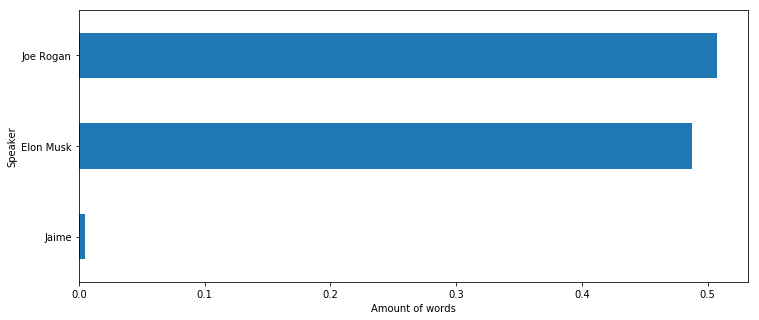

In [5]:
plt.rcParams["figure.figsize"] = (12,5)
dt['TextLength'] = dt['Text'].apply(lambda x: len(x))
g1 = dt.groupby('Speaker')['TextLength'].sum().apply(lambda x: x/sum(dt['TextLength'])).sort_values().plot.barh()
plt.xlabel('Amount of words')
#x axis sum of speakers words = 1.0

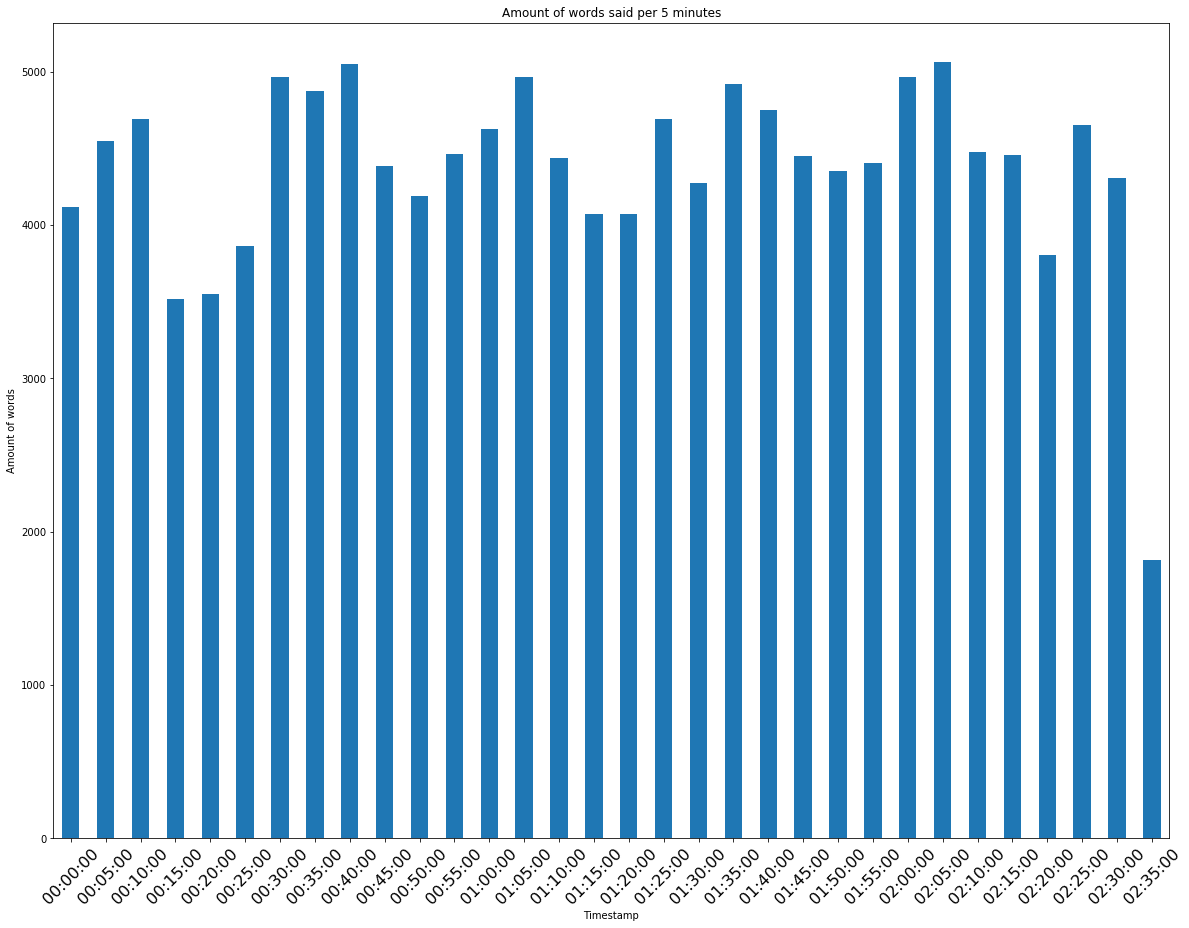

In [6]:
plt.rcParams["figure.figsize"] = (20,15)
g1 = dt.groupby(pd.Grouper(key='Timestamp',freq='5Min'))['TextLength'].sum().plot.bar()
xlabels = g1.get_xticklabels()
new_labels = [datetime.strptime(xlabel.get_text(),'%Y-%m-%d %H:%M:%S').time() for xlabel in xlabels]
g1.set_xticklabels(new_labels,rotation=45, fontsize=16)
plt.title('Amount of words said per 5 minutes')
plt.ylabel('Amount of words')
plt.show()

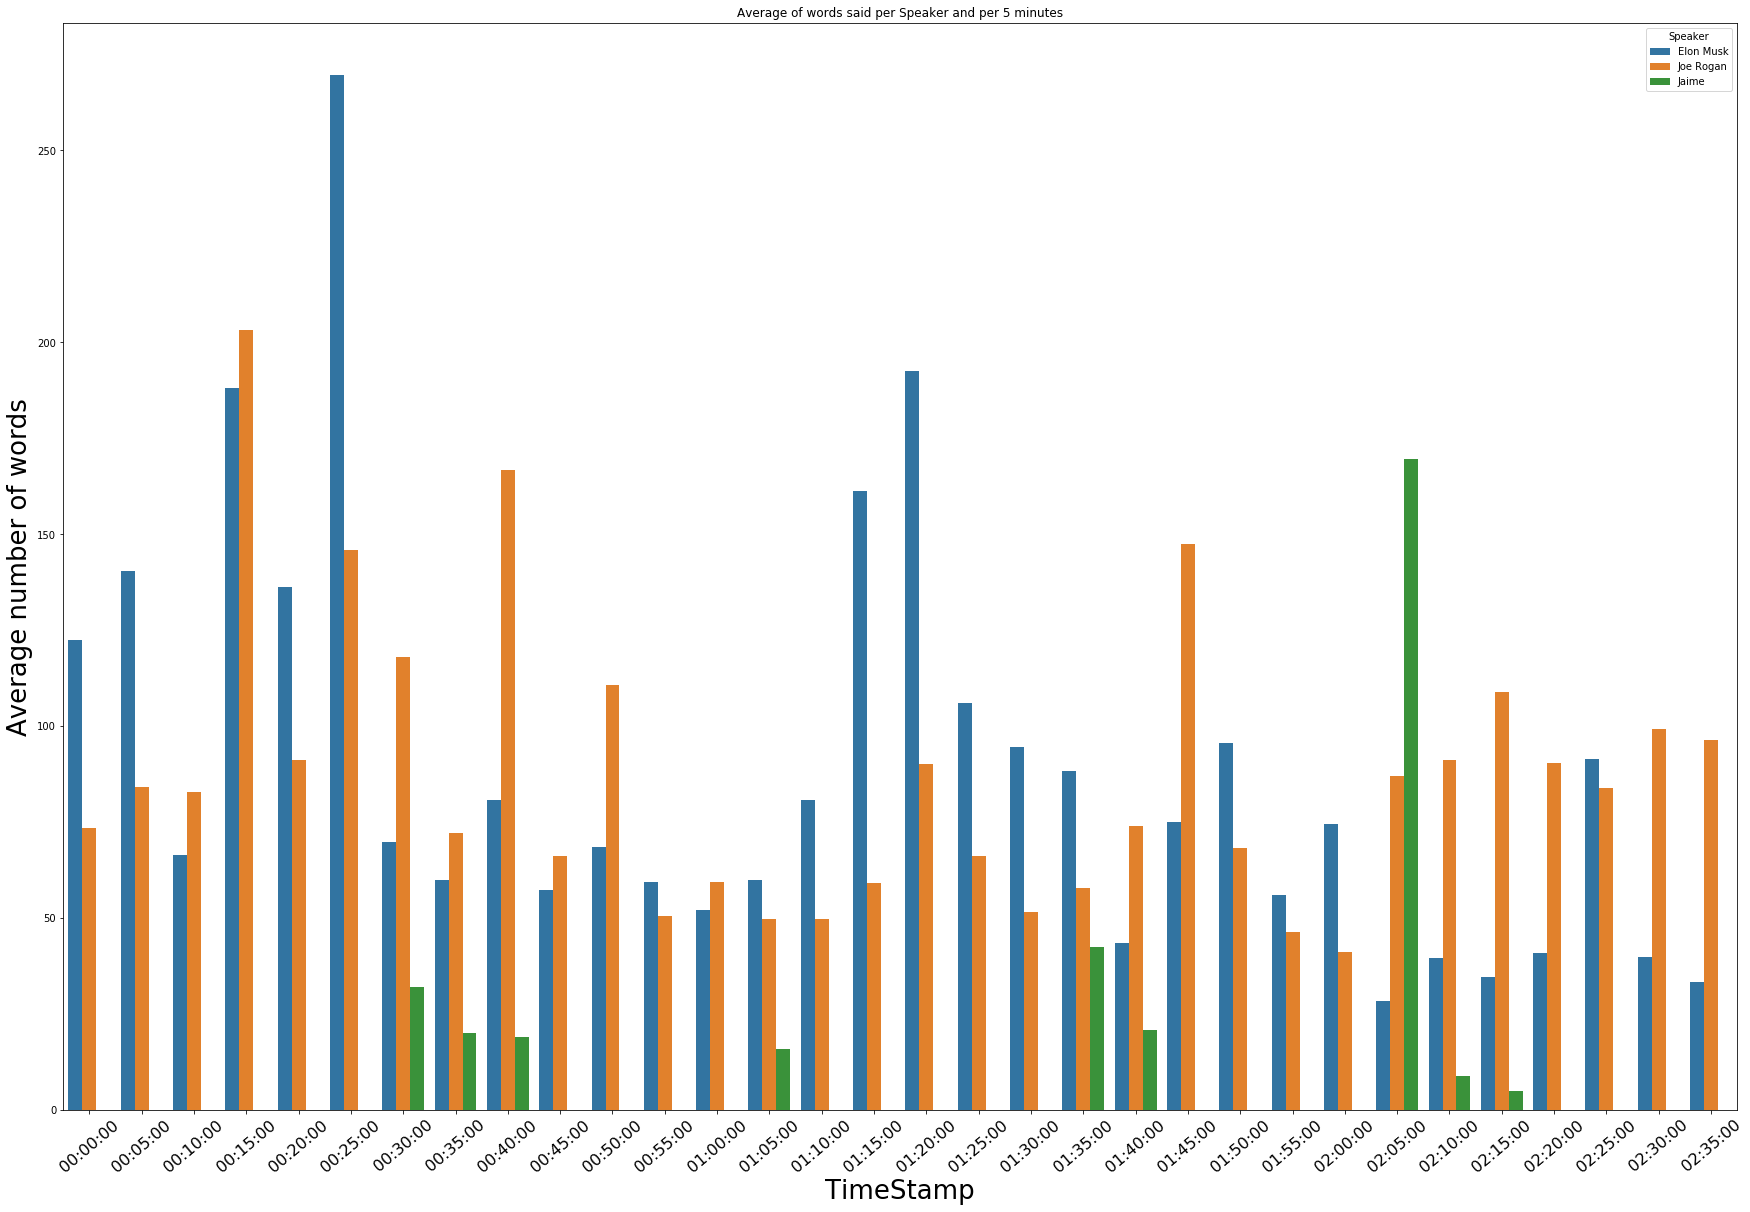

In [7]:
plt.rcParams["figure.figsize"] = (30,20)
dt1 = dt.groupby([pd.Grouper(key='Timestamp',freq='5Min'),'Speaker'])['TextLength'].mean().reset_index()
dt1['Timestamp'] = dt1['Timestamp'].dt.time
g2 = sb.barplot(x='Timestamp',y='TextLength',hue='Speaker',data=dt1)
g2.set_xticklabels(g2.get_xticklabels(), rotation=40, fontsize=16)
plt.title('Average of words said per Speaker and per 5 minutes')
plt.ylabel('Average number of words',fontsize=26)
plt.xlabel('TimeStamp',fontsize=26)
plt.show()

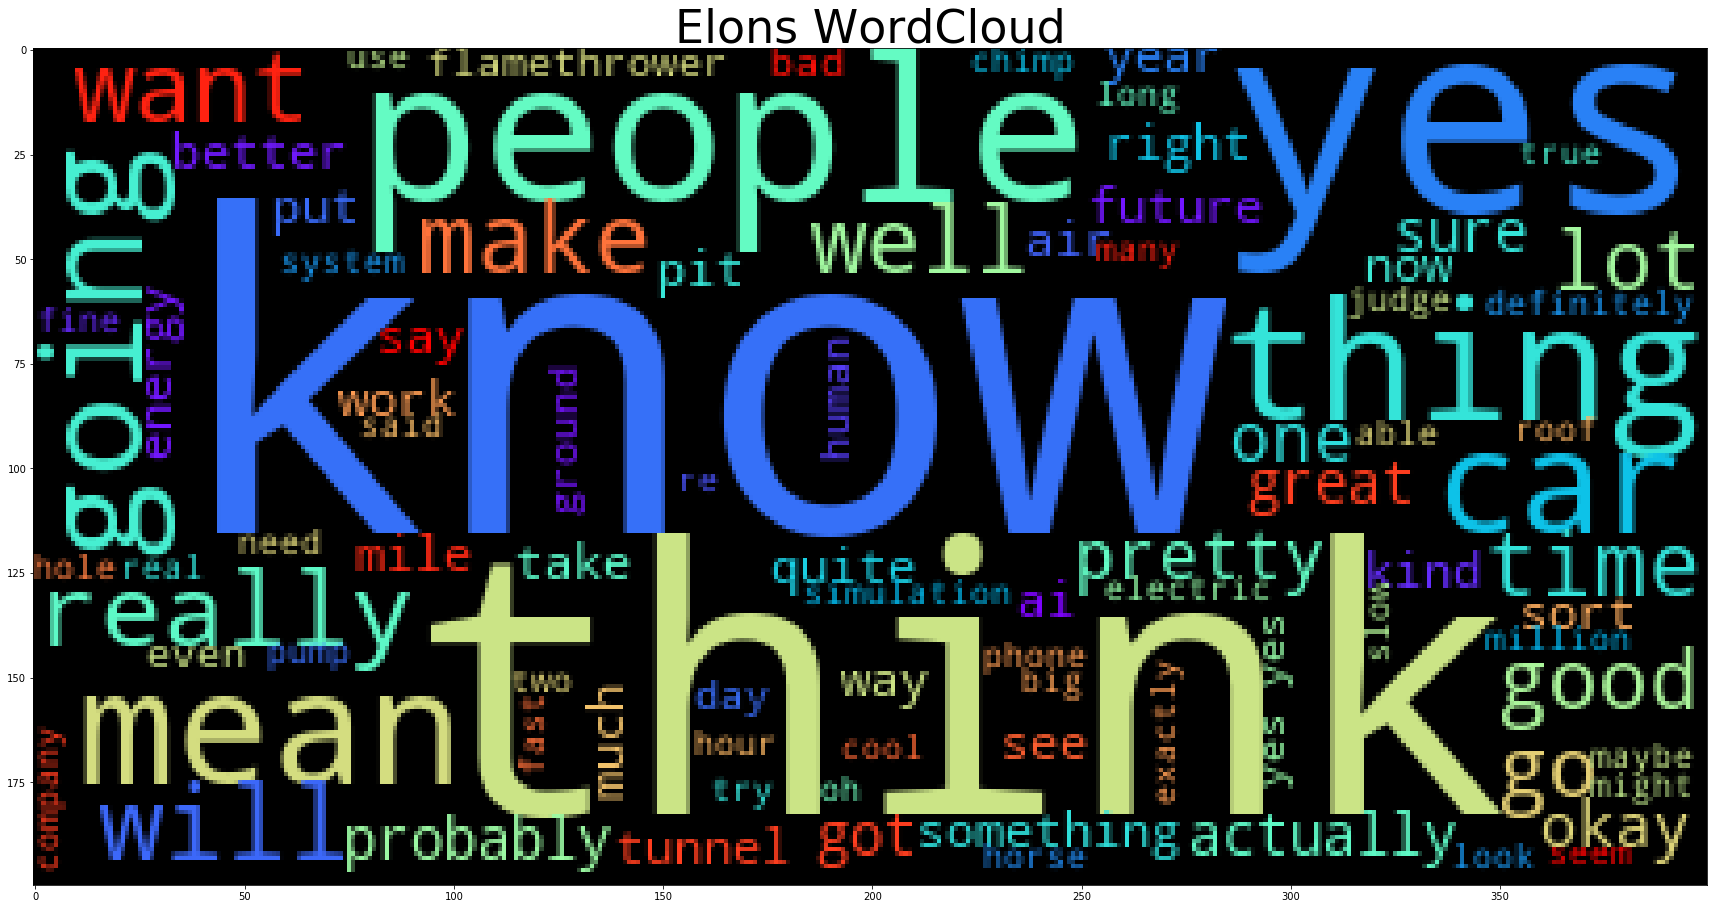

In [8]:
stopwords = set(STOPWORDS)
stopwords.update(["like", "yeah"])

dt_elon = dt.loc[dt['Speaker'] == 'Elon Musk']['Text'].str.lower()
wordcloud = WordCloud(background_color="black",margin=0,max_words=90,stopwords=stopwords,colormap='rainbow').generate(str(dt_elon.values))

plt.imshow(wordcloud)
plt.title("Elons WordCloud", fontsize=46)
plt.show()

In [9]:
#wordcloud.to_file("elons_wordcloud.png")

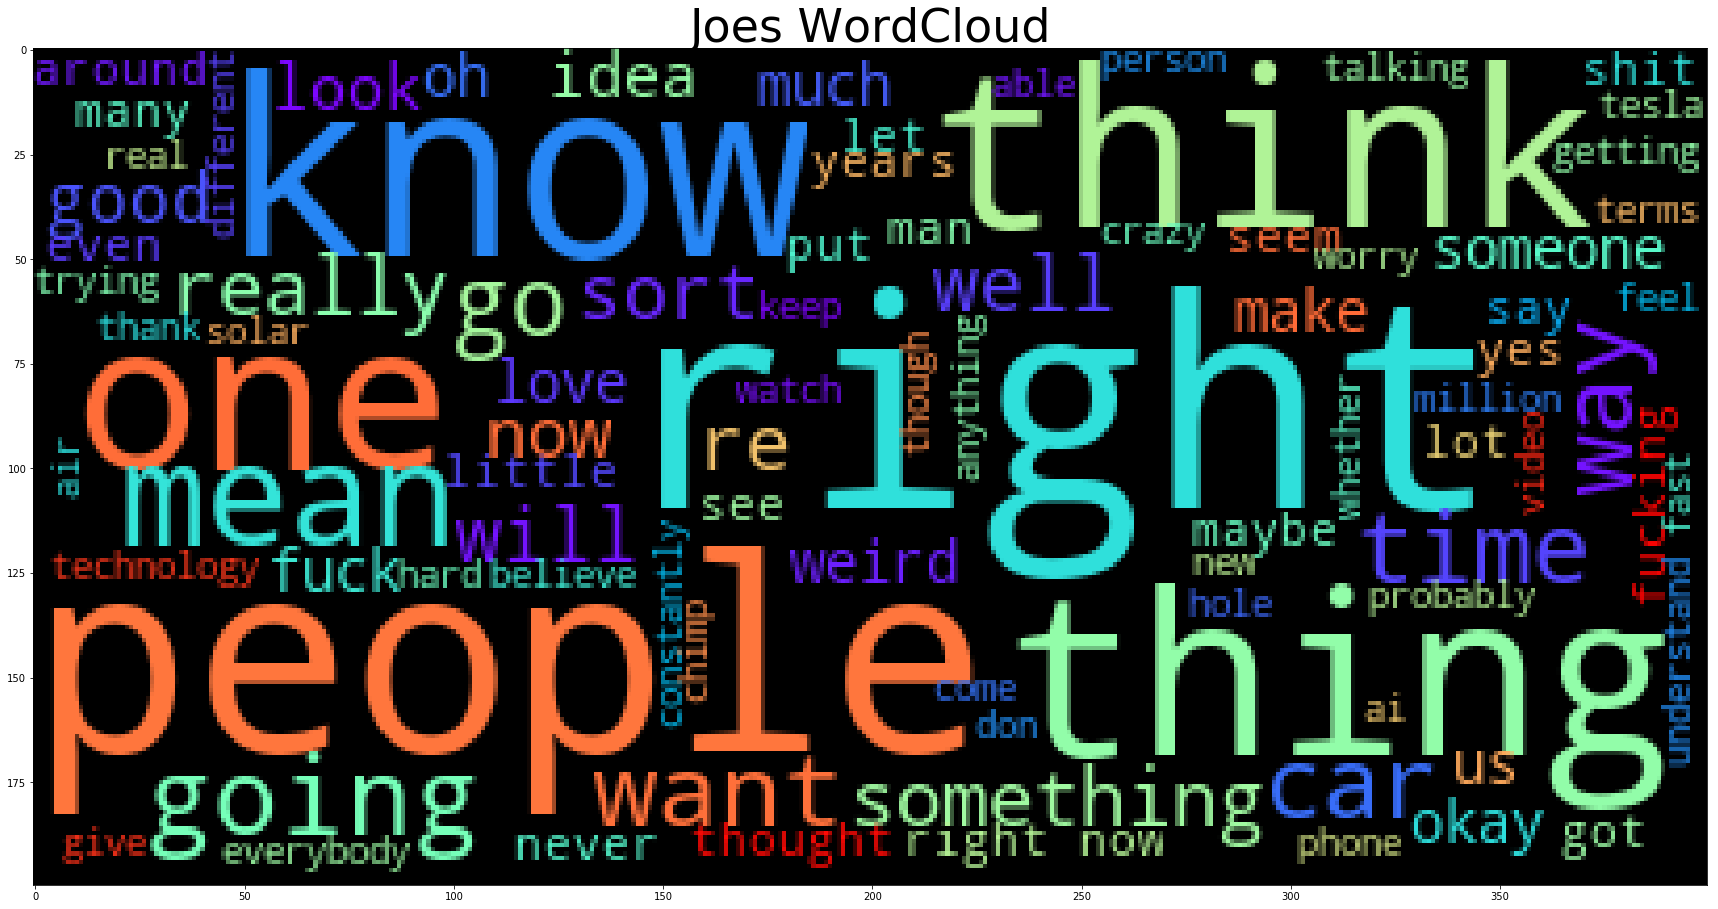

In [10]:
stopwords = set(STOPWORDS)
stopwords.update(["like", "yeah"])

dt_joe = dt.loc[dt['Speaker'] == 'Joe Rogan']['Text'].str.lower()
wordcloud = WordCloud(background_color="black",margin=0,max_words=90,stopwords=stopwords,colormap='rainbow').generate(str(dt_joe.values))

plt.imshow(wordcloud)
plt.title("Joes WordCloud", fontsize=46)
plt.show()

In [11]:
#wordcloud.to_file("joes_wordcloud.png")